## CaseCraft: The Analytics Sprint – Project 2  
### LinkedIn PYMK Optimization  
**Subheading:** Predicting potential connections using graph-based link prediction—modeled after LinkedIn’s “People You May Know” feature.

---

### Objective

LinkedIn’s “People You May Know” (PYMK) feature suggests new connections based on mutual links, shared interests, and network proximity.  
This project simulates a social graph and applies link prediction techniques to identify likely future connections.

**Goals:**
- Simulate a user connection graph
- Visualize network structure and centrality
- Apply link prediction using common neighbors and Jaccard similarity
- Identify top potential connections for each user

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.metrics import jaccard_score

# Create a synthetic undirected graph
G = nx.Graph()

# Add 30 users
users = [f'U{i}' for i in range(1, 31)]
G.add_nodes_from(users)

# Randomly connect users
np.random.seed(42)
for u1, u2 in combinations(users, 2):
    if np.random.rand() < 0.1:  # 10% chance of connection
        G.add_edge(u1, u2)

print(f"Total nodes: {G.number_of_nodes()}, Total edges: {G.number_of_edges()}")

Total nodes: 30, Total edges: 54


### Graph Overview

We simulate a LinkedIn-style social graph with 30 users and random connections.  
This forms the basis for link prediction and network analysis.

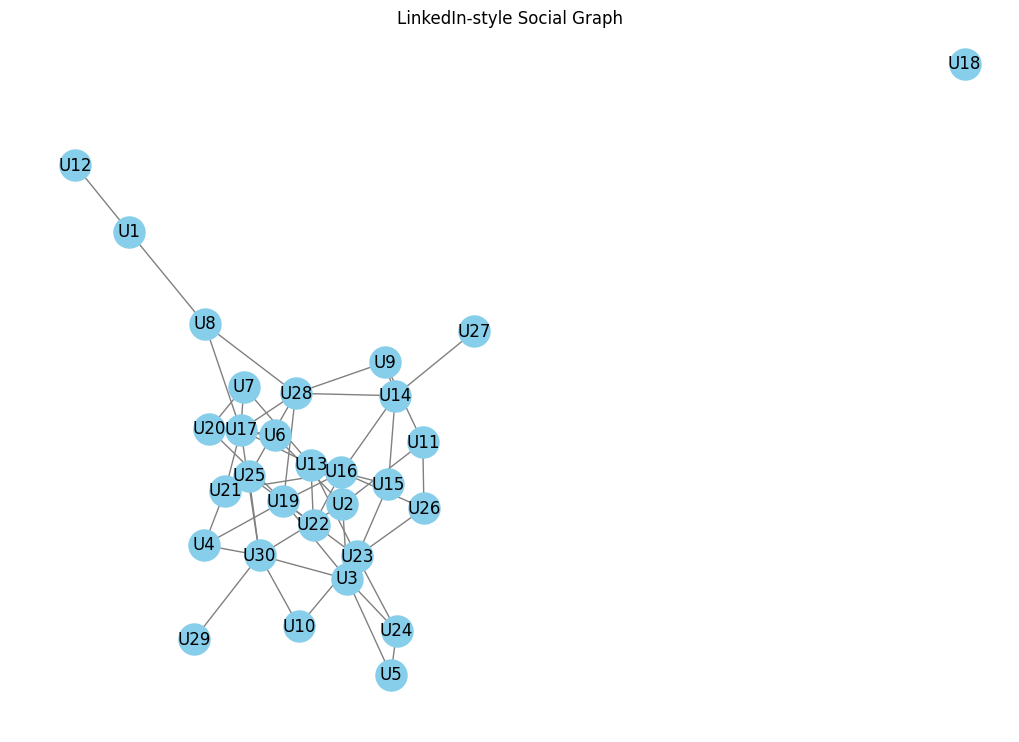

In [ ]:
# Visualize the network
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
plt.title("LinkedIn-style Social Graph")
plt.show()

### Degree Distribution

Analyzing how many connections each user has helps identify influencers and isolated nodes.

In [ ]:
degrees = dict(G.degree())
degree_df = pd.DataFrame(degrees.items(), columns=['User', 'Connections'])
degree_df.sort_values(by='Connections', ascending=False).head()

User  Connections
18  U19            8
16  U17            7
29  U30            7
15  U16            6
2    U3            6

### Top Central Users

Using degree centrality to identify users with the most influence in the network.

In [ ]:
centrality = nx.degree_centrality(G)
central_df = pd.DataFrame(centrality.items(), columns=['User', 'Centrality'])
central_df.sort_values(by='Centrality', ascending=False).head()

User  Centrality
18  U19    0.275862
16  U17    0.241379
29  U30    0.241379
15  U16    0.206897
2    U3    0.206897

### Link Prediction – Common Neighbors

We identify potential connections based on shared neighbors—users with mutual friends.

In [ ]:
def common_neighbors_score(graph, node):
    scores = {}
    for other in graph.nodes():
        if node != other and not graph.has_edge(node, other):
            common = len(list(nx.common_neighbors(graph, node, other)))
            scores[other] = common
    return sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Example: Top suggestions for U1
common_neighbors_score(G, 'U1')[:5]

[('U17', 1), ('U28', 1), ('U2', 0), ('U3', 0), ('U4', 0)]

### Link Prediction – Jaccard Similarity

Jaccard score compares the overlap of neighbors between two users.

In [ ]:
preds = list(nx.jaccard_coefficient(G))
top_preds = sorted(preds, key=lambda x: x[2], reverse=True)[:5]
for u1, u2, score in top_preds:
    print(f"{u1} ↔ {u2} | Jaccard Score: {score:.2f}")

U6 ↔ U7 | Jaccard Score: 0.50
U25 ↔ U4 | Jaccard Score: 0.50
U10 ↔ U29 | Jaccard Score: 0.50
U25 ↔ U29 | Jaccard Score: 0.33
U4 ↔ U29 | Jaccard Score: 0.33


### Potential Connections Table

Top predicted links based on Jaccard similarity and common neighbors.

In [ ]:
suggestions = pd.DataFrame(top_preds, columns=['User1', 'User2', 'Jaccard_Score'])
suggestions

User1 User2  Jaccard_Score
0    U6    U7       0.500000
1   U25    U4       0.500000
2   U10   U29       0.500000
3   U25   U29       0.333333
4    U4   U29       0.333333

### Connection Distribution Histogram

Visualizing how many connections each user has to understand network density and outliers.

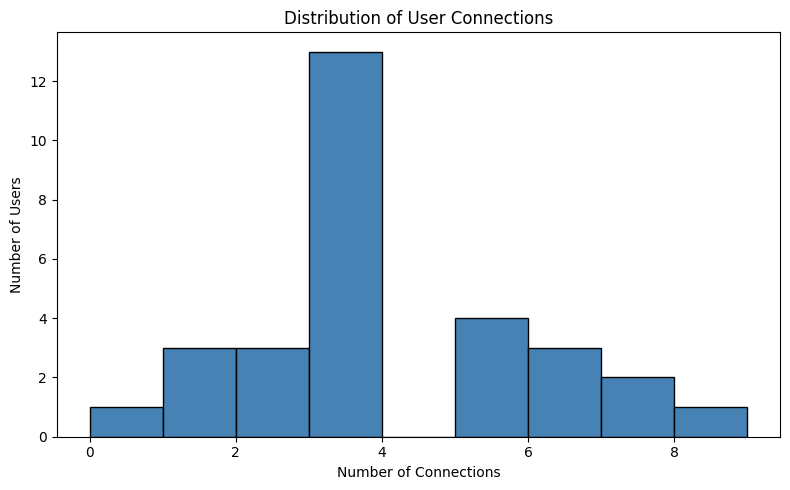

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(degree_df['Connections'], bins=range(0, max(degree_df['Connections'])+2), color='steelblue', edgecolor='black')
plt.title("Distribution of User Connections")
plt.xlabel("Number of Connections")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

### Top 10 Users by Centrality

Bar chart showing the most central users in the network based on degree centrality.

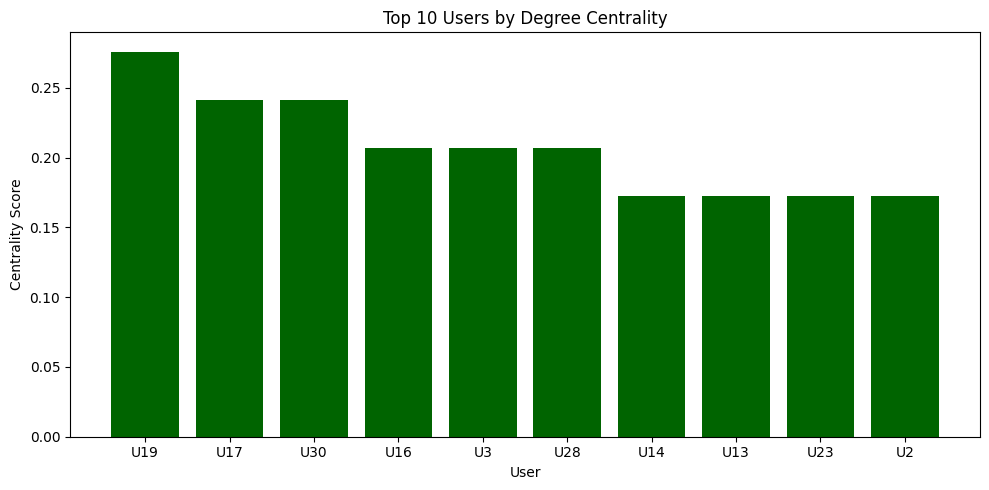

In [ ]:
top_central = central_df.sort_values(by='Centrality', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_central['User'], top_central['Centrality'], color='darkgreen')
plt.title("Top 10 Users by Degree Centrality")
plt.xlabel("User")
plt.ylabel("Centrality Score")
plt.tight_layout()
plt.show()

### Predicted Connections Heatmap

Heatmap of top predicted links based on Jaccard similarity scores.

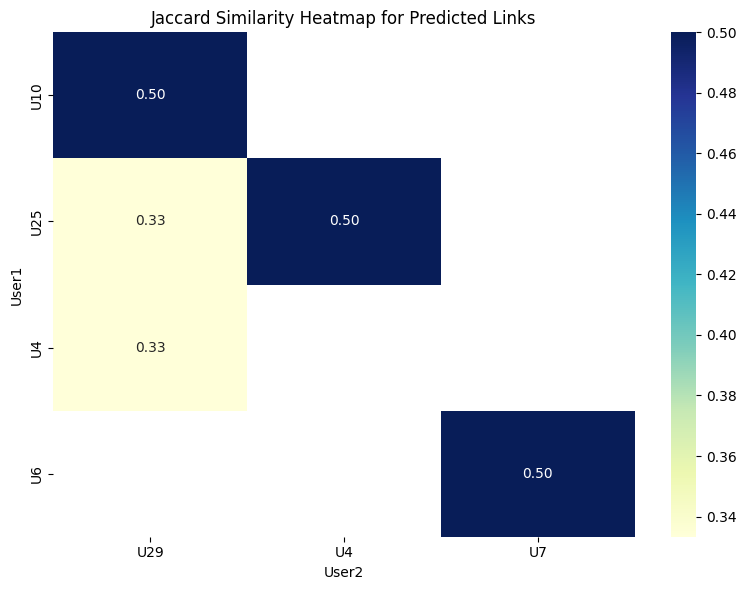

In [ ]:
import seaborn as sns

# Prepare data for heatmap
heatmap_df = pd.DataFrame(top_preds, columns=['User1', 'User2', 'Score'])
pivot = heatmap_df.pivot(index='User1', columns='User2', values='Score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Jaccard Similarity Heatmap for Predicted Links")
plt.tight_layout()
plt.show()

### Final Conclusion

**1. Network Structure**  
The simulated LinkedIn-style graph reveals a sparse but connected network, with a few users acting as central hubs.

**2. Influencer Identification**  
Degree centrality highlights top users who are well-connected and likely to influence connection suggestions.

**3. Link Prediction Techniques**  
Common neighbors and Jaccard similarity provide interpretable, graph-based methods to suggest new links.  
These techniques surface users with overlapping social circles who are not yet connected.

**4. Visualization Insights**  
Histograms and centrality charts help quantify network density and user influence.  
The heatmap of predicted links offers a compact view of high-potential connections.

**5. Business Implication**  
This approach mirrors real-world PYMK systems and can be scaled using graph embeddings or ML models.  
It supports personalized recommendations and strengthens user engagement through relevant suggestions.

This project demonstrates how graph theory and link prediction can power scalable, interpretable recommendation systems.